In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from kaggle.api.kaggle_api_extended import KaggleApi
from scipy import stats
import math
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [7]:
# api = KaggleApi()
# api.authenticate()

# data_url = 'spscientist/students-performance-in-exams'

# api.dataset_download_files(data_url, path='./data', unzip=True)

In [28]:
df = pd.read_csv('./data/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


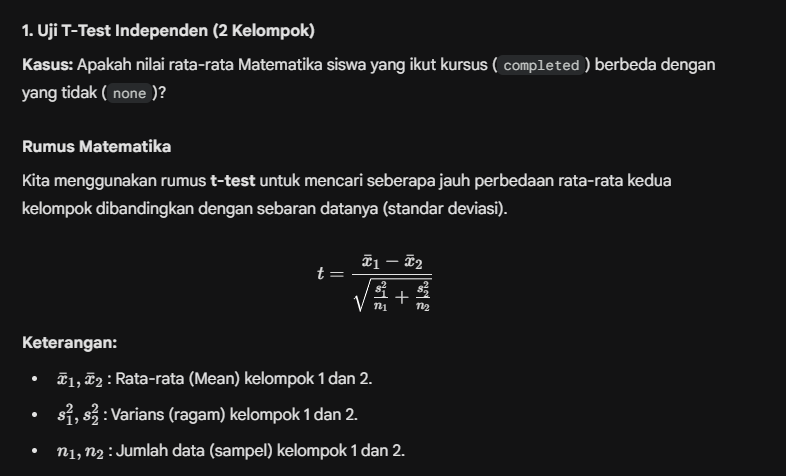

In [40]:
grup_complete = df[df['test preparation course'] == 'completed']['math score']
grup_none = df[df['test preparation course'] == 'none']['math score']

# Hitung Komponen Rumus
# Rata-rata (Mean)
mean1 = sum(grup_complete) / len(grup_complete)
mean2 = sum(grup_none) / len(grup_none)

# Varians (S^2) = Jumlah kuadrat selisih data dengan mean / (n-1)
var1 = sum((x - mean1) ** 2 for x in grup_complete) / (len(grup_complete) - 1)
var2 = sum((x - mean2) ** 2 for x in grup_none) / (len(grup_none) - 1)

# jumlah sample (n)
n1 = len(grup_complete)
n2 = len(grup_none)

# masukkan rumus t
pembilang = mean1 - mean2
penyebut = math.sqrt((var1 / n1) + (var2 / n2))
t_score = pembilang / penyebut

# Critical Value untuk t (approximate untuk n besar, alpha 0.05, two-tailed) is 1.96
t_critical = 1.96
conclusion_t = "Tolak H0 (Signifikan)" if abs(t_score) > t_critical else "Gagal Tolak H0"

print(f"Rata-rata Kelompok Completed : {mean1:.2f}")
print(f"Rata-rata Kelompok None      : {mean2:.2f}")
print(f"Varians Kelompok Completed   : {var1:.2f}")
print(f"Varians Kelompok None        : {var2:.2f}")
print("-" * 30)
print(f"Nilai t-hitung (Statistic)   : {t_score:.4f}")
print(f"Nilai t-tabel (Batas Kritis) : > {t_critical}")
print(f"KESIMPULAN                   : {conclusion_t}")
if abs(t_score) > t_critical:
    print("-> Artinya: Kursus persiapan TERBUKTI meningkatkan nilai matematika secara nyata.")

Rata-rata Kelompok Completed : 69.70
Rata-rata Kelompok None      : 64.08
Varians Kelompok Completed   : 208.65
Varians Kelompok None        : 230.81
------------------------------
Nilai t-hitung (Statistic)   : 5.7870
Nilai t-tabel (Batas Kritis) : > 1.96
KESIMPULAN                   : Tolak H0 (Signifikan)
-> Artinya: Kursus persiapan TERBUKTI meningkatkan nilai matematika secara nyata.


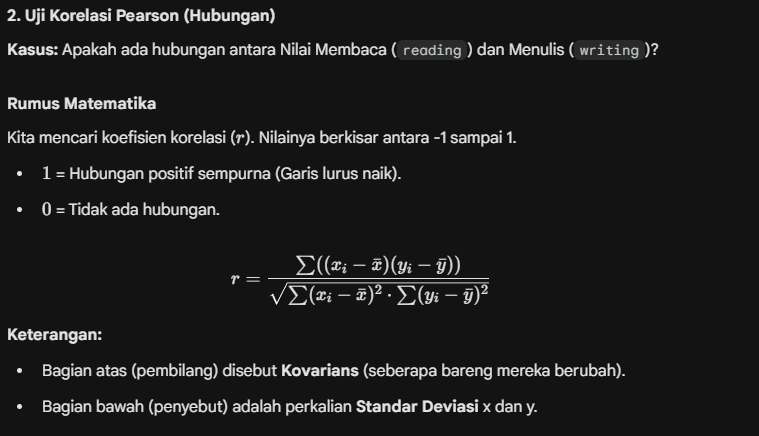

In [39]:
x_data = df['reading score'] # variable x
y_data = df['writing score'] # y
n = len(x_data)

mean_x = sum(x_data) / n
mean_y = sum(y_data) / n

# hitung pembilang (atas) dan penyebut (bawah)
pembilang = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x_data, y_data))

sum_sq_x = sum((xi - mean_x) **2 for xi in x_data)
sum_sq_y = sum((yi - mean_y) **2 for yi in y_data)
penyebut = math.sqrt(sum_sq_x * sum_sq_y)
 # hitung r
r_score = pembilang / penyebut

# Interpretasi Kekuatan Hubungan
if abs(r_score) > 0.8: kekuatan = "Sangat Kuat"
elif abs(r_score) > 0.6: kekuatan = "Kuat"
elif abs(r_score) > 0.4: kekuatan = "Sedang"
else: kekuatan = "Lemah"

print(f"Kovarians (Pembilang)          : {pembilang:.2f}")
print(f"Penyebut (Simpangan Baku)      : {penyebut:.2f}")
print("-" * 30)
print(f"Nilai Korelasi (r-hitung)      : {r_score:.4f}")
print(f"Kekuatan Hubungan              : {kekuatan}")
print(f"KESIMPULAN                     : Ada hubungan linier positif yang {kekuatan}.")
print("-> Artinya: Semakin tinggi nilai membaca, hampir pasti nilai menulis juga semakin tinggi.")
# Interpretasi:
# > 0.8 : Hubungan Sangat Kuat
# 0.5 - 0.7 : Hubungan Sedang

Kovarians (Pembilang)          : 211574.87
Penyebut (Simpangan Baku)      : 221637.65
------------------------------
Nilai Korelasi (r-hitung)      : 0.9546
Kekuatan Hubungan              : Sangat Kuat
KESIMPULAN                     : Ada hubungan linier positif yang Sangat Kuat.
-> Artinya: Semakin tinggi nilai membaca, hampir pasti nilai menulis juga semakin tinggi.


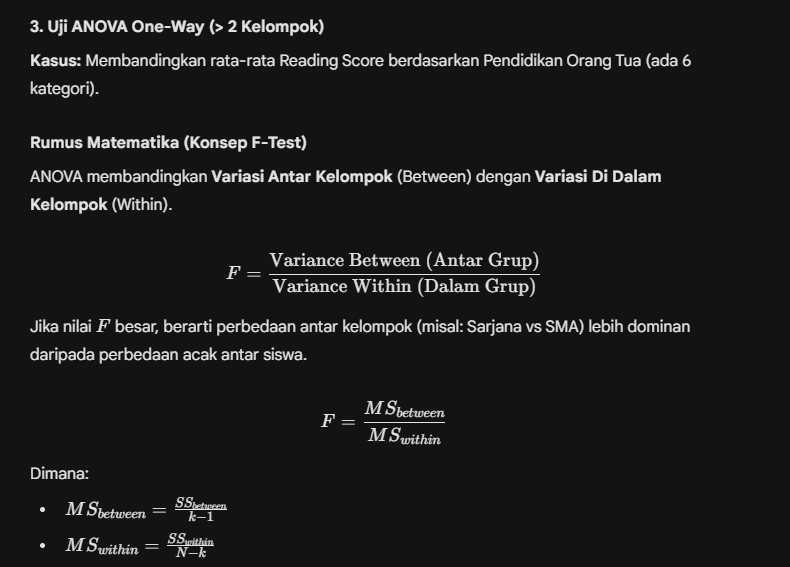

In [38]:
kategori_edu = df['parental level of education'].unique()
all_grup = [df[df['parental level of education'] == k]['reading score'] for k in kategori_edu]

all_scores = df['reading score']
grand_mean = sum(all_scores) / len(all_scores)

ss_between = 0
for grup in all_grup:
    n_grup = len(grup)
    mean_grup = sum(grup) / len(grup)
    ss_between += n_grup * ((mean_grup - grand_mean) **2)
    
ss_within = 0
for grup in all_grup:
    mean_grup = sum(grup) / len(grup)
    sum_sq_diff = sum((x - mean_grup) **2 for x in grup)
    ss_within += sum_sq_diff
    
# hitung derajat kebebasan (df)
k = len(all_grup)
N = len(all_scores)
df_between = k - 1
df_within = N - k

# Hitung mean square (MS) dan f-score
ms_between = ss_between / df_between
ms_within = ss_within / df_within

f_score = ms_between / ms_within

# Critical Value F (approximate for df1=5, df2=994 at alpha=0.05) is roughly 2.21
f_critical = 2.21 
conclusion_f = "Tolak H0 (Signifikan)" if f_score > f_critical else "Gagal Tolak H0"

print(f"Variasi Antar Grup (MS Between) : {ms_between:.2f}")
print(f"Variasi Dalam Grup (MS Within)  : {ms_within:.2f}")
print("-" * 30)
print(f"Nilai F-hitung (Statistic)      : {f_score:.4f}")
print(f"Nilai F-tabel (Batas Kritis)    : {f_critical}")
print(f"KESIMPULAN                      : {conclusion_f}")
if f_score > f_critical:
    print("-> Artinya: Pendidikan orang tua BERPENGARUH signifikan terhadap nilai membaca anak.")
# Semakin besar F-score, semakin besar kemungkinan ada perbedaan antar kelompok.

Variasi Antar Grup (MS Between) : 1901.30
Variasi Dalam Grup (MS Within)  : 204.67
------------------------------
Nilai F-hitung (Statistic)      : 9.2894
Nilai F-tabel (Batas Kritis)    : 2.21
KESIMPULAN                      : Tolak H0 (Signifikan)
-> Artinya: Pendidikan orang tua BERPENGARUH signifikan terhadap nilai membaca anak.


In [43]:
# Print Output Format
print("--- OUTPUT ANALISIS MANUAL (TANPA LIBRARY STATISTIK) ---")
print("\n1. HIPOTESIS KOMPARATIF 2 KELOMPOK (T-Test)")
print('-'*100)
print(f"Rata-rata Kelompok Completed : {mean1:.2f}")
print(f"Rata-rata Kelompok None      : {mean2:.2f}")
print(f"Varians Kelompok Completed   : {var1:.2f}")
print(f"Varians Kelompok None        : {var2:.2f}")
print("-" * 30)
print(f"Nilai t-hitung (Statistic)   : {t_score:.4f}")
print(f"Nilai t-tabel (Batas Kritis) : > {t_critical}")
print(f"KESIMPULAN                   : {conclusion_t}")
if abs(t_score) > t_critical:
    print("-> Artinya: Kursus persiapan TERBUKTI meningkatkan nilai matematika secara nyata.")
    
print('='*100)

print("\n2. HIPOTESIS KOMPARATIF >2 KELOMPOK (ANOVA)")
print('-'*100)
print(f"Variasi Antar Grup (MS Between) : {ms_between:.2f}")
print(f"Variasi Dalam Grup (MS Within)  : {ms_within:.2f}")
print("-" * 30)
print(f"Nilai F-hitung (Statistic)      : {f_score:.4f}")
print(f"Nilai F-tabel (Batas Kritis)    : {f_critical}")
print(f"KESIMPULAN                      : {conclusion_f}")
if f_score > f_critical:
    print("-> Artinya: Pendidikan orang tua BERPENGARUH signifikan terhadap nilai membaca anak.")
    
print('='*100)

print("\n3. HIPOTESIS ASOSIATIF (KORELASI PEARSON)")
print('-'*100)
if abs(r_score) > 0.8: kekuatan = "Sangat Kuat"
elif abs(r_score) > 0.6: kekuatan = "Kuat"
elif abs(r_score) > 0.4: kekuatan = "Sedang"
else: kekuatan = "Lemah"

print(f"Kovarians (Pembilang)          : {pembilang:.2f}")
print(f"Penyebut (Simpangan Baku)      : {penyebut:.2f}")
print("-" * 30)
print(f"Nilai Korelasi (r-hitung)      : {r_score:.4f}")
print(f"Kekuatan Hubungan              : {kekuatan}")
print(f"KESIMPULAN                     : Ada hubungan linier positif yang {kekuatan}.")
print("-> Artinya: Semakin tinggi nilai membaca, hampir pasti nilai menulis juga semakin tinggi.")

--- OUTPUT ANALISIS MANUAL (TANPA LIBRARY STATISTIK) ---

1. HIPOTESIS KOMPARATIF 2 KELOMPOK (T-Test)
----------------------------------------------------------------------------------------------------
Rata-rata Kelompok Completed : 69.70
Rata-rata Kelompok None      : 64.08
Varians Kelompok Completed   : 208.65
Varians Kelompok None        : 230.81
------------------------------
Nilai t-hitung (Statistic)   : 5.7870
Nilai t-tabel (Batas Kritis) : > 1.96
KESIMPULAN                   : Tolak H0 (Signifikan)
-> Artinya: Kursus persiapan TERBUKTI meningkatkan nilai matematika secara nyata.

2. HIPOTESIS KOMPARATIF >2 KELOMPOK (ANOVA)
----------------------------------------------------------------------------------------------------
Variasi Antar Grup (MS Between) : 1901.30
Variasi Dalam Grup (MS Within)  : 204.67
------------------------------
Nilai F-hitung (Statistic)      : 9.2894
Nilai F-tabel (Batas Kritis)    : 2.21
KESIMPULAN                      : Tolak H0 (Signifikan)
-> Artiny

In [44]:
# Set style
sns.set(style="whitegrid")

# 1. Plot for Hypothesis 1: Test Prep vs Math Score (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='math score', data=df, palette="Set2")
plt.title('Perbandingan Nilai Matematika: Kursus Persiapan vs Tidak', fontsize=14)
plt.xlabel('Status Kursus Persiapan')
plt.ylabel('Nilai Matematika')
plt.savefig('math_score_by_prep_course.png')
plt.close()

# 2. Plot for Hypothesis 2: Parental Education vs Reading Score (Boxplot)
plt.figure(figsize=(12, 6))
order_edu = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
sns.boxplot(x='parental level of education', y='reading score', data=df, order=order_edu, palette="viridis")
plt.title('Distribusi Nilai Membaca Berdasarkan Pendidikan Orang Tua', fontsize=14)
plt.xlabel('Pendidikan Orang Tua')
plt.ylabel('Nilai Membaca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('reading_score_by_parental_edu.png')
plt.close()

# 3. Plot for Hypothesis 3: Reading vs Writing Correlation (Scatterplot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reading score', y='writing score', data=df, alpha=0.6, color='blue')
# Add a regression line manually for visualization or use regplot
sns.regplot(x='reading score', y='writing score', data=df, scatter=False, color='red')
plt.title('Korelasi Antara Nilai Membaca dan Menulis', fontsize=14)
plt.xlabel('Nilai Membaca')
plt.ylabel('Nilai Menulis')
plt.savefig('reading_vs_writing_correlation.png')
plt.close()

print("Plots created successfully.")

Plots created successfully.
